# Start

In [35]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

In [36]:
friendships = [
    (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)
]

In [39]:
# Add friends to users
for user in users:
    user["friends"] = []
    
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [40]:
# Average number of connections
def number_of_friends(user):
    return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users)
print("Total: %d, Average: %.2f" % (total_connections, total_connections / float(len(users))))


Total: 24, Average: 2.40


In [41]:
# Users with max number of friends
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

print("Init:\n", num_friends_by_id)

print("Sorted:\n", sorted(num_friends_by_id, key=lambda p: p[1], reverse=True))

Init:
 [(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]
Sorted:
 [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


# Friends Recommendation

In [43]:
from collections import Counter

def not_the_same(user, other_user):
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    return all(not_the_same(friend, other_user)
              for friend in user["friends"])

def friends_of_friends_ids(user):
    return Counter(foaf["id"]
        for friend in user["friends"] # for all my friends
        for foaf in friend["friends"] # count their friends
        if not_the_same(foaf, user)   # except me
        and not_friends(foaf, user)   # except my friends
    )

print(friends_of_friends_ids(users[3]))

Counter({0: 2, 5: 1})


In [46]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3 ,"R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [52]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    interests_by_user_id[user_id].append(interest)
    
# most common interests with user
# return dict with
#     - key - user_id
#     - value - number of common interests
def most_common_interests_with(user):
    return Counter(interested_user_id
                  for interest in interests_by_user_id[user["id"]]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user["id"])

print(most_common_interests_with(users[0]))
print(most_common_interests_with(users[1]))
print(most_common_interests_with(users[4]))

Counter({9: 3, 1: 2, 8: 1, 5: 1})
Counter({0: 2})
Counter({3: 1, 7: 1})


# Salary and Experience

In [55]:
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)
]

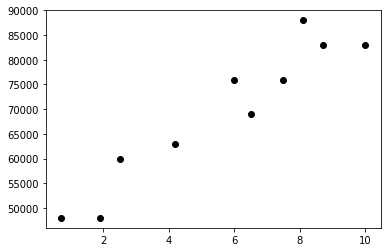

In [56]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = [p[1] for p in salaries_and_tenures]
y = [p[0] for p in salaries_and_tenures]
plt.plot(x, y, 'o', color='black')

In [61]:
salary_by_tenure_bucket = defaultdict(list)

def tenure_bucket(tenure):
    if tenure < 2:
        return "[0. 2)]"
    elif tenure < 5:
        return "[2, 5)"
    else:
        return "[5, inf)"


for salary, tenure in salaries_and_tenures:
    bucket  = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / float(len(salaries))
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket
    

{'[0. 2)]': 48000.0, '[2, 5)': 61500.0, '[5, inf)': 79166.66666666667}

# Premium account

In [ ]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

# Popular Themes

In [65]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())


for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

data 3
java 3
learning 3
python 3
big 3
probability 2
r 2
scikit-learn 2
cassandra 2
networks 2
statistics 2
hadoop 2
machine 2
regression 2
neural 2
hbase 2
